## Final Project Submission

Please fill out:
* Student name: Purity Murugi Riungu
* Student pace: part time 
* Scheduled project review date/time: 02/06/23
* Instructor name: Everlyn 
* Blog post URL:

Problem Statement

In this project, we explored the different factors that impact the price of homes in Kingston County. We examined these features, constructed them and evaluated models to forecast the home prices

Objectives;

The project will aim at answering the questions below;

1.How the key factors that contribute to the estimated value of a home

2.How dodifferent types of home renovations impact the overall value of a property?

3.What data sources or metrics can be utilized to accurately assess the impact of renovations on home value?

In [ ]:
#Importing the required libraries
import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
#Reading the csv file
df = pd.read_csv('/content/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [ ]:
#The first five columns of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
#The last five columns of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [ ]:
#A summary of the dataset's columns 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#A summary of the dataset's general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
#Assessing the shape of the dataset, i.e rows and columns 
df.shape

(21597, 21)

In [ ]:
# A statistical summary of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# Checking the columns with null values and how many they are
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
# Converting dates into datetime objects
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Checking for the change in the new dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# **Exploring the Features of the Dataset**

This section explores the following features for the houses:
- Condition
- Basement
- View
- Waterfront
- zipcode
- Bedrooms 
- Bathrooms


```
```



# Condition

In [ ]:
df['condition'].value_counts(sort=False)

3    14020
5     1701
4     5677
1       29
2      170
Name: condition, dtype: int64

In [ ]:
df['condition'].nunique()

5

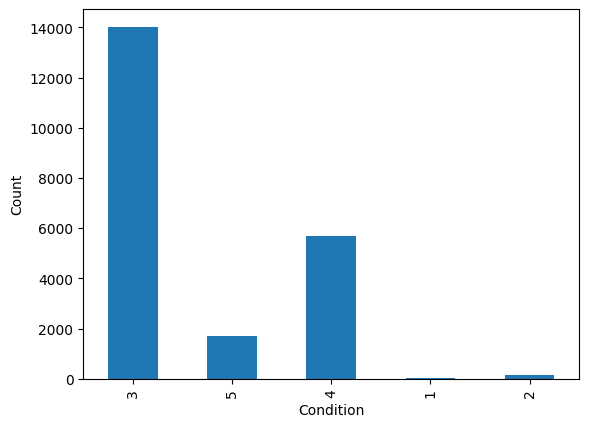

In [ ]:
df['condition'].value_counts(sort=False).plot.bar()
plt.xlabel('Condition')
plt.ylabel('Count')

# Displaying the plot
plt.show()


# Basement

In [ ]:
#calculating the square footage of the basement by subtracting the square footage above ground from the total living square footage.
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']


In [ ]:
df['sqft_basement'].describe()


count    21597.000000
mean       291.725008
std        442.667800
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [ ]:
#Create a new variable to make the basement binary. 0 if there's no basement and 1 otherwise
df['basement'] = [0 if x <= 0  else 1 for x in df['sqft_basement']]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287,0


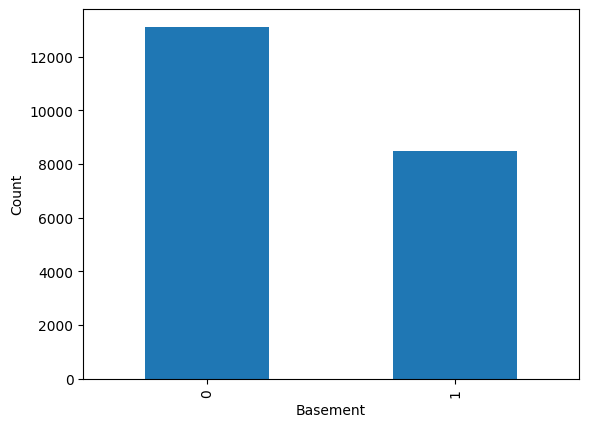

In [ ]:
df['basement'].value_counts().plot.bar()
plt.xlabel('Basement')
plt.ylabel('Count')
plt.show()

# View

In [ ]:
#Finding the unique values in the view column, i.e the houses with a view ranging from 0 to 5
df['view'].unique()


array([ 0., nan,  3.,  4.,  2.,  1.])

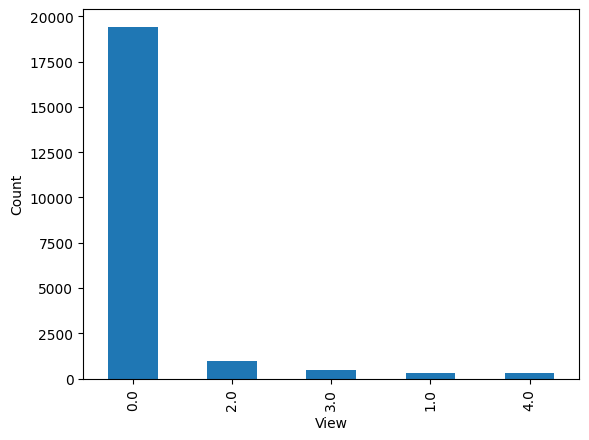

In [ ]:
df['view'].value_counts().plot.bar()
plt.xlabel('View')
plt.ylabel('Count')
plt.show()


In [ ]:
#Create a new variable called viewed and make it binary. 1 if the house has been viewed and 0 otherwise.
df['viewed'] = [0 if x == 0  else 1 for x in df['view']]
df['viewed'].value_counts()

0    19422
1     2175
Name: viewed, dtype: int64

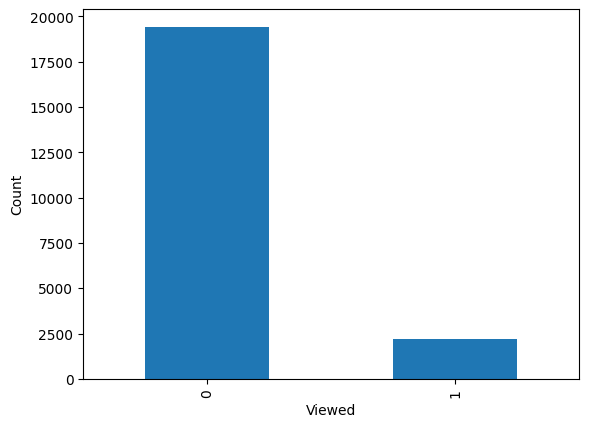

In [ ]:
#Plotting the viewed houses against the ones that haven't been viewed yet
df['viewed'].value_counts().plot.bar()
plt.xlabel('Viewed')
plt.ylabel('Count')
plt.show()

# Waterfront

In [ ]:
#Revisiting the null values in the waterfront column
df['waterfront'].isnull().sum()


2376

In [ ]:
#Checking the number of unique values in the waterfront column
df['waterfront'].value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [ ]:
#Replacing null values with 0s
df['waterfront'].fillna(0).head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

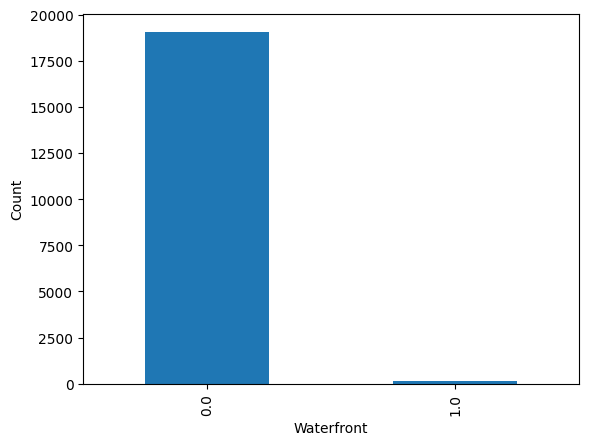

In [ ]:
#Plotting the number of houses with a waterfront (146)against the ones without(19075)
df['waterfront'].value_counts().plot.bar()
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.show()

# Zip Code

In [ ]:
df['zipcode'].unique()


array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [ ]:
#Summary statistics for the modified dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,viewed
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,...,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,...,291.725008,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.392971,0.100708
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,...,442.667800,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.488422,0.300949
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000


# Bedrooms

Unique bedroom Values:
[ 3  2  4  5  1  6  7  8  9 11 10 33]

Value Counts:
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


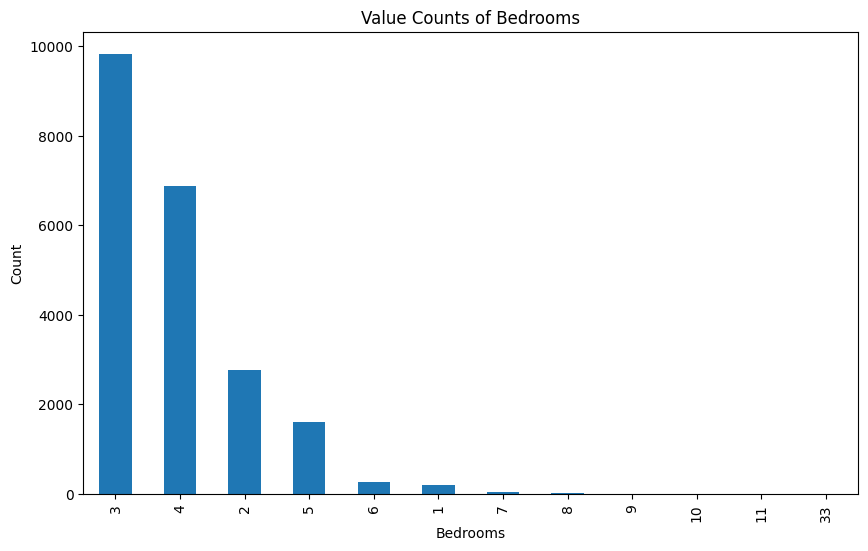

In [ ]:

bedrooms_column = df['bedrooms']

# Print unique bedroom values
print("Unique bedroom Values:")
print(bedrooms_column.unique())

# Print value counts
print("\nValue Counts:")
print(bedrooms_column.value_counts())

# Plotting the value counts
plt.figure(figsize=(10, 6))
bedrooms_column.value_counts().plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Value Counts of Bedrooms')
plt.show()


# Bathrooms

Unique bathrooms Values:
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]

Value Counts:
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


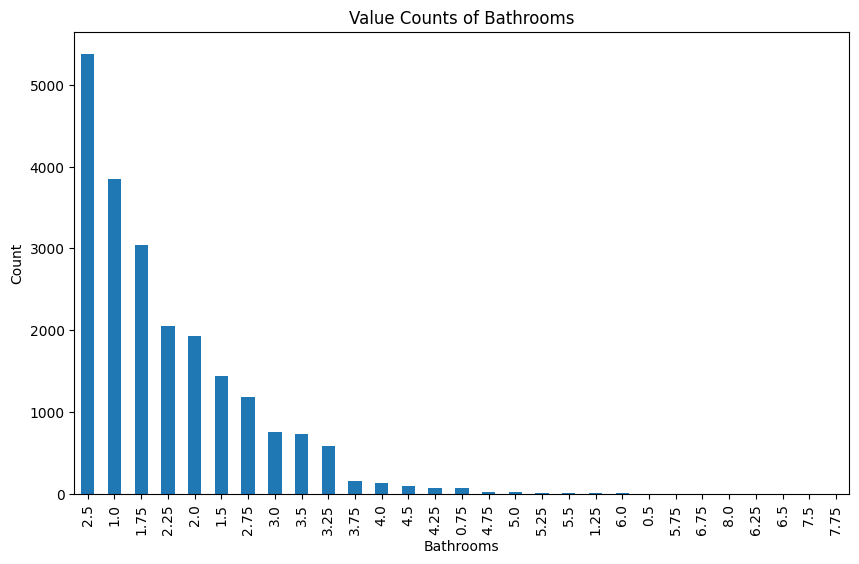

In [ ]:
import matplotlib.pyplot as plt

bathrooms_column = df['bathrooms']

# Print unique bathroom values
print("Unique bathrooms Values:")
print(bathrooms_column.unique())

# Print value counts
print("\nValue Counts:")
print(bathrooms_column.value_counts())

# Plotting the value counts
plt.figure(figsize=(10, 6))
bathrooms_column.value_counts().plot(kind='bar')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title('Value Counts of Bathrooms')
plt.show()


In [ ]:
#checking for null values again
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
basement            0
viewed              0
dtype: int64

In [ ]:
df['waterfront'].fillna(0, inplace=True)


In [ ]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
basement            0
viewed              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

# **Exploratory Data Analysis**

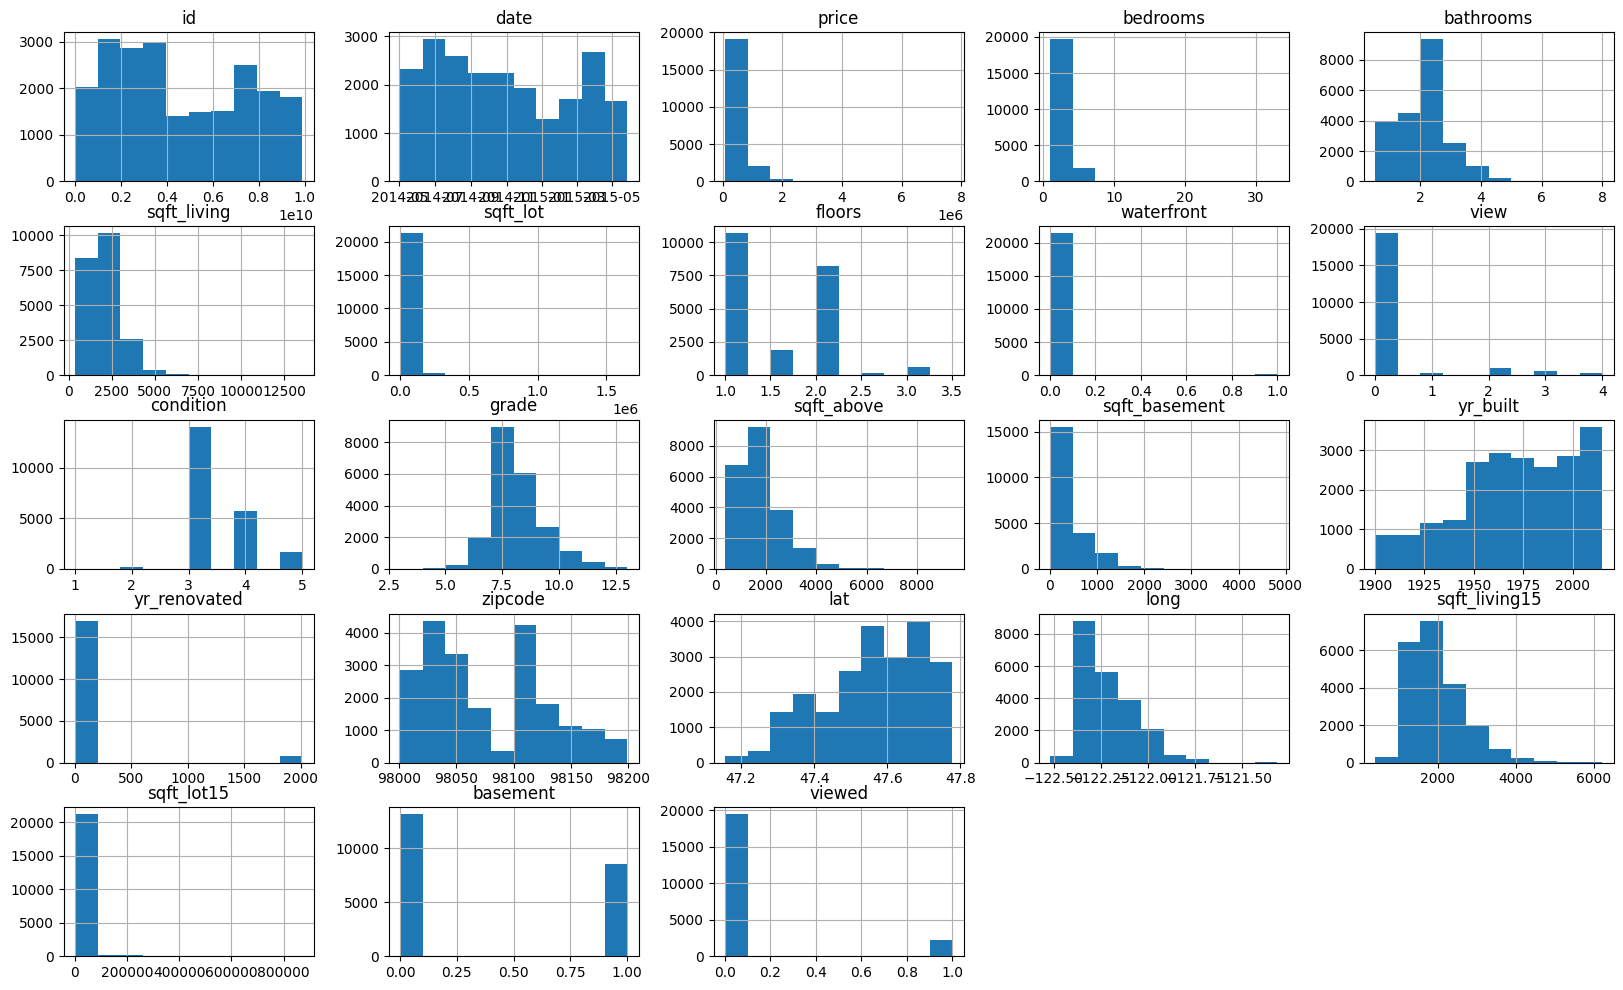

In [ ]:
#Viewing the distributions of all variables
df.hist(figsize=(20,12))
plt.show()

In [ ]:
#Creating a new dataframe with all the relevant features 
new_df = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','grade','viewed','sqft_above','sqft_basement','lat','sqft_living15']]
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,viewed,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0.0,7,0,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,7242,2.0,0.0,7,0,2170,400,47.7210,1690
2,180000.0,2,1.00,770,10000,1.0,0.0,6,0,770,0,47.7379,2720
3,604000.0,4,3.00,1960,5000,1.0,0.0,7,0,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,8080,1.0,0.0,8,0,1680,0,47.6168,1800


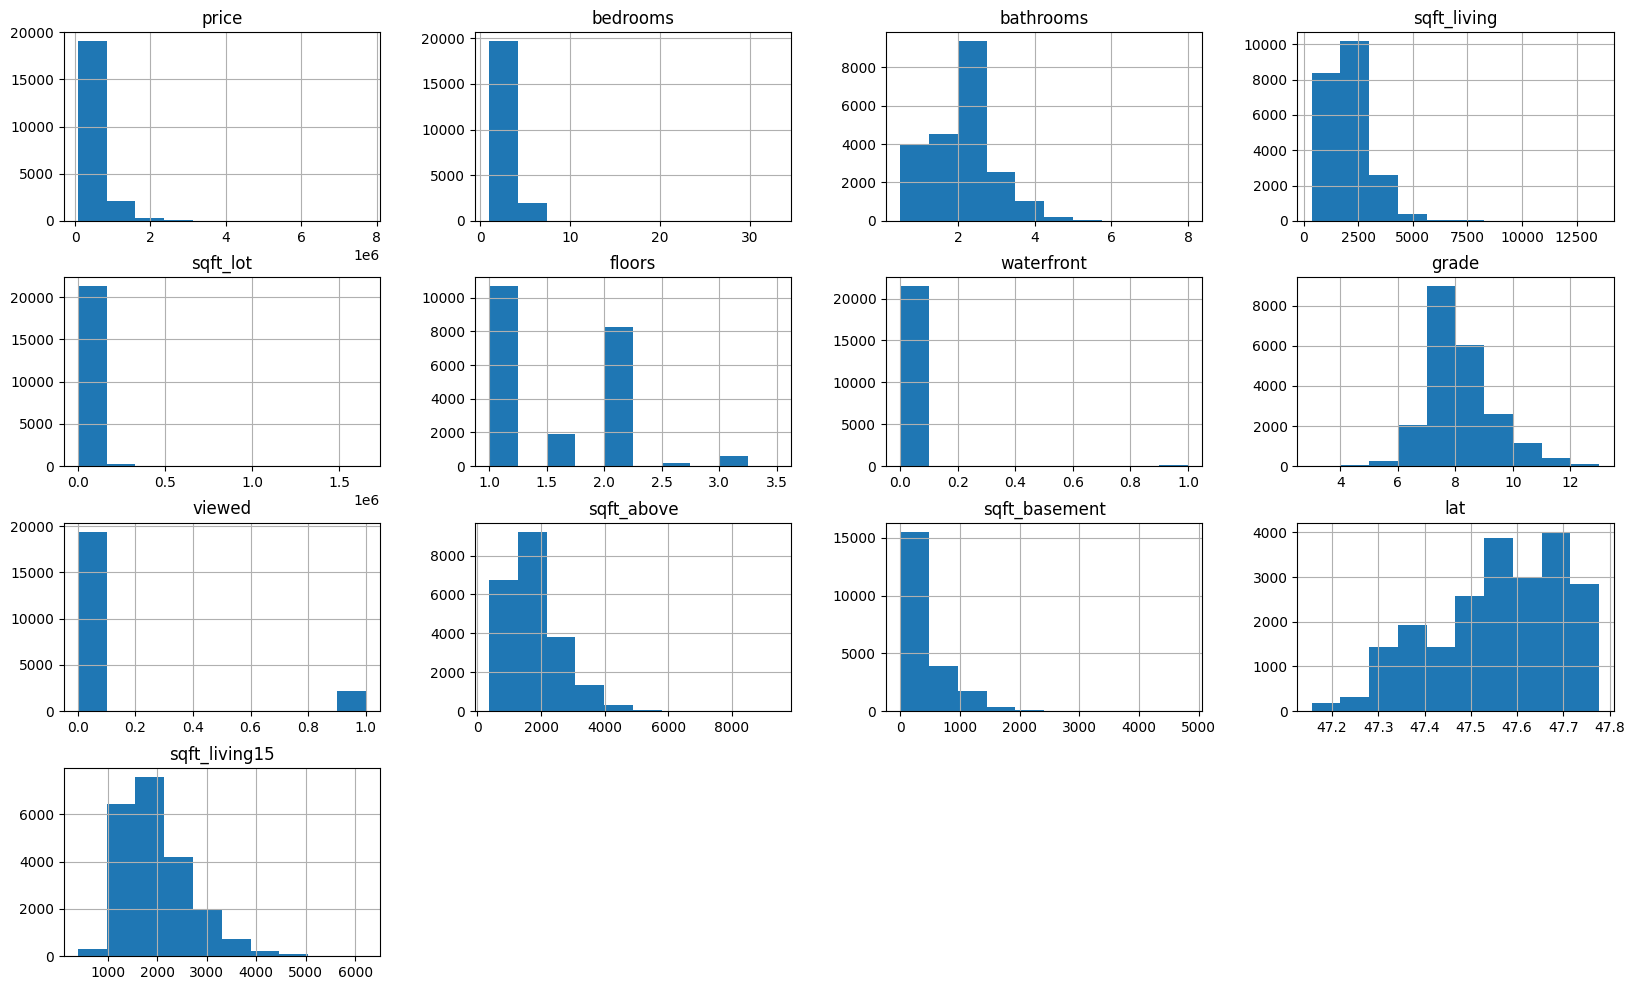

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plotting the new dataframe
new_df.hist(figsize=(20,12))
plt.show()
plt.savefig('/content/download (2).png', dpi = 150)



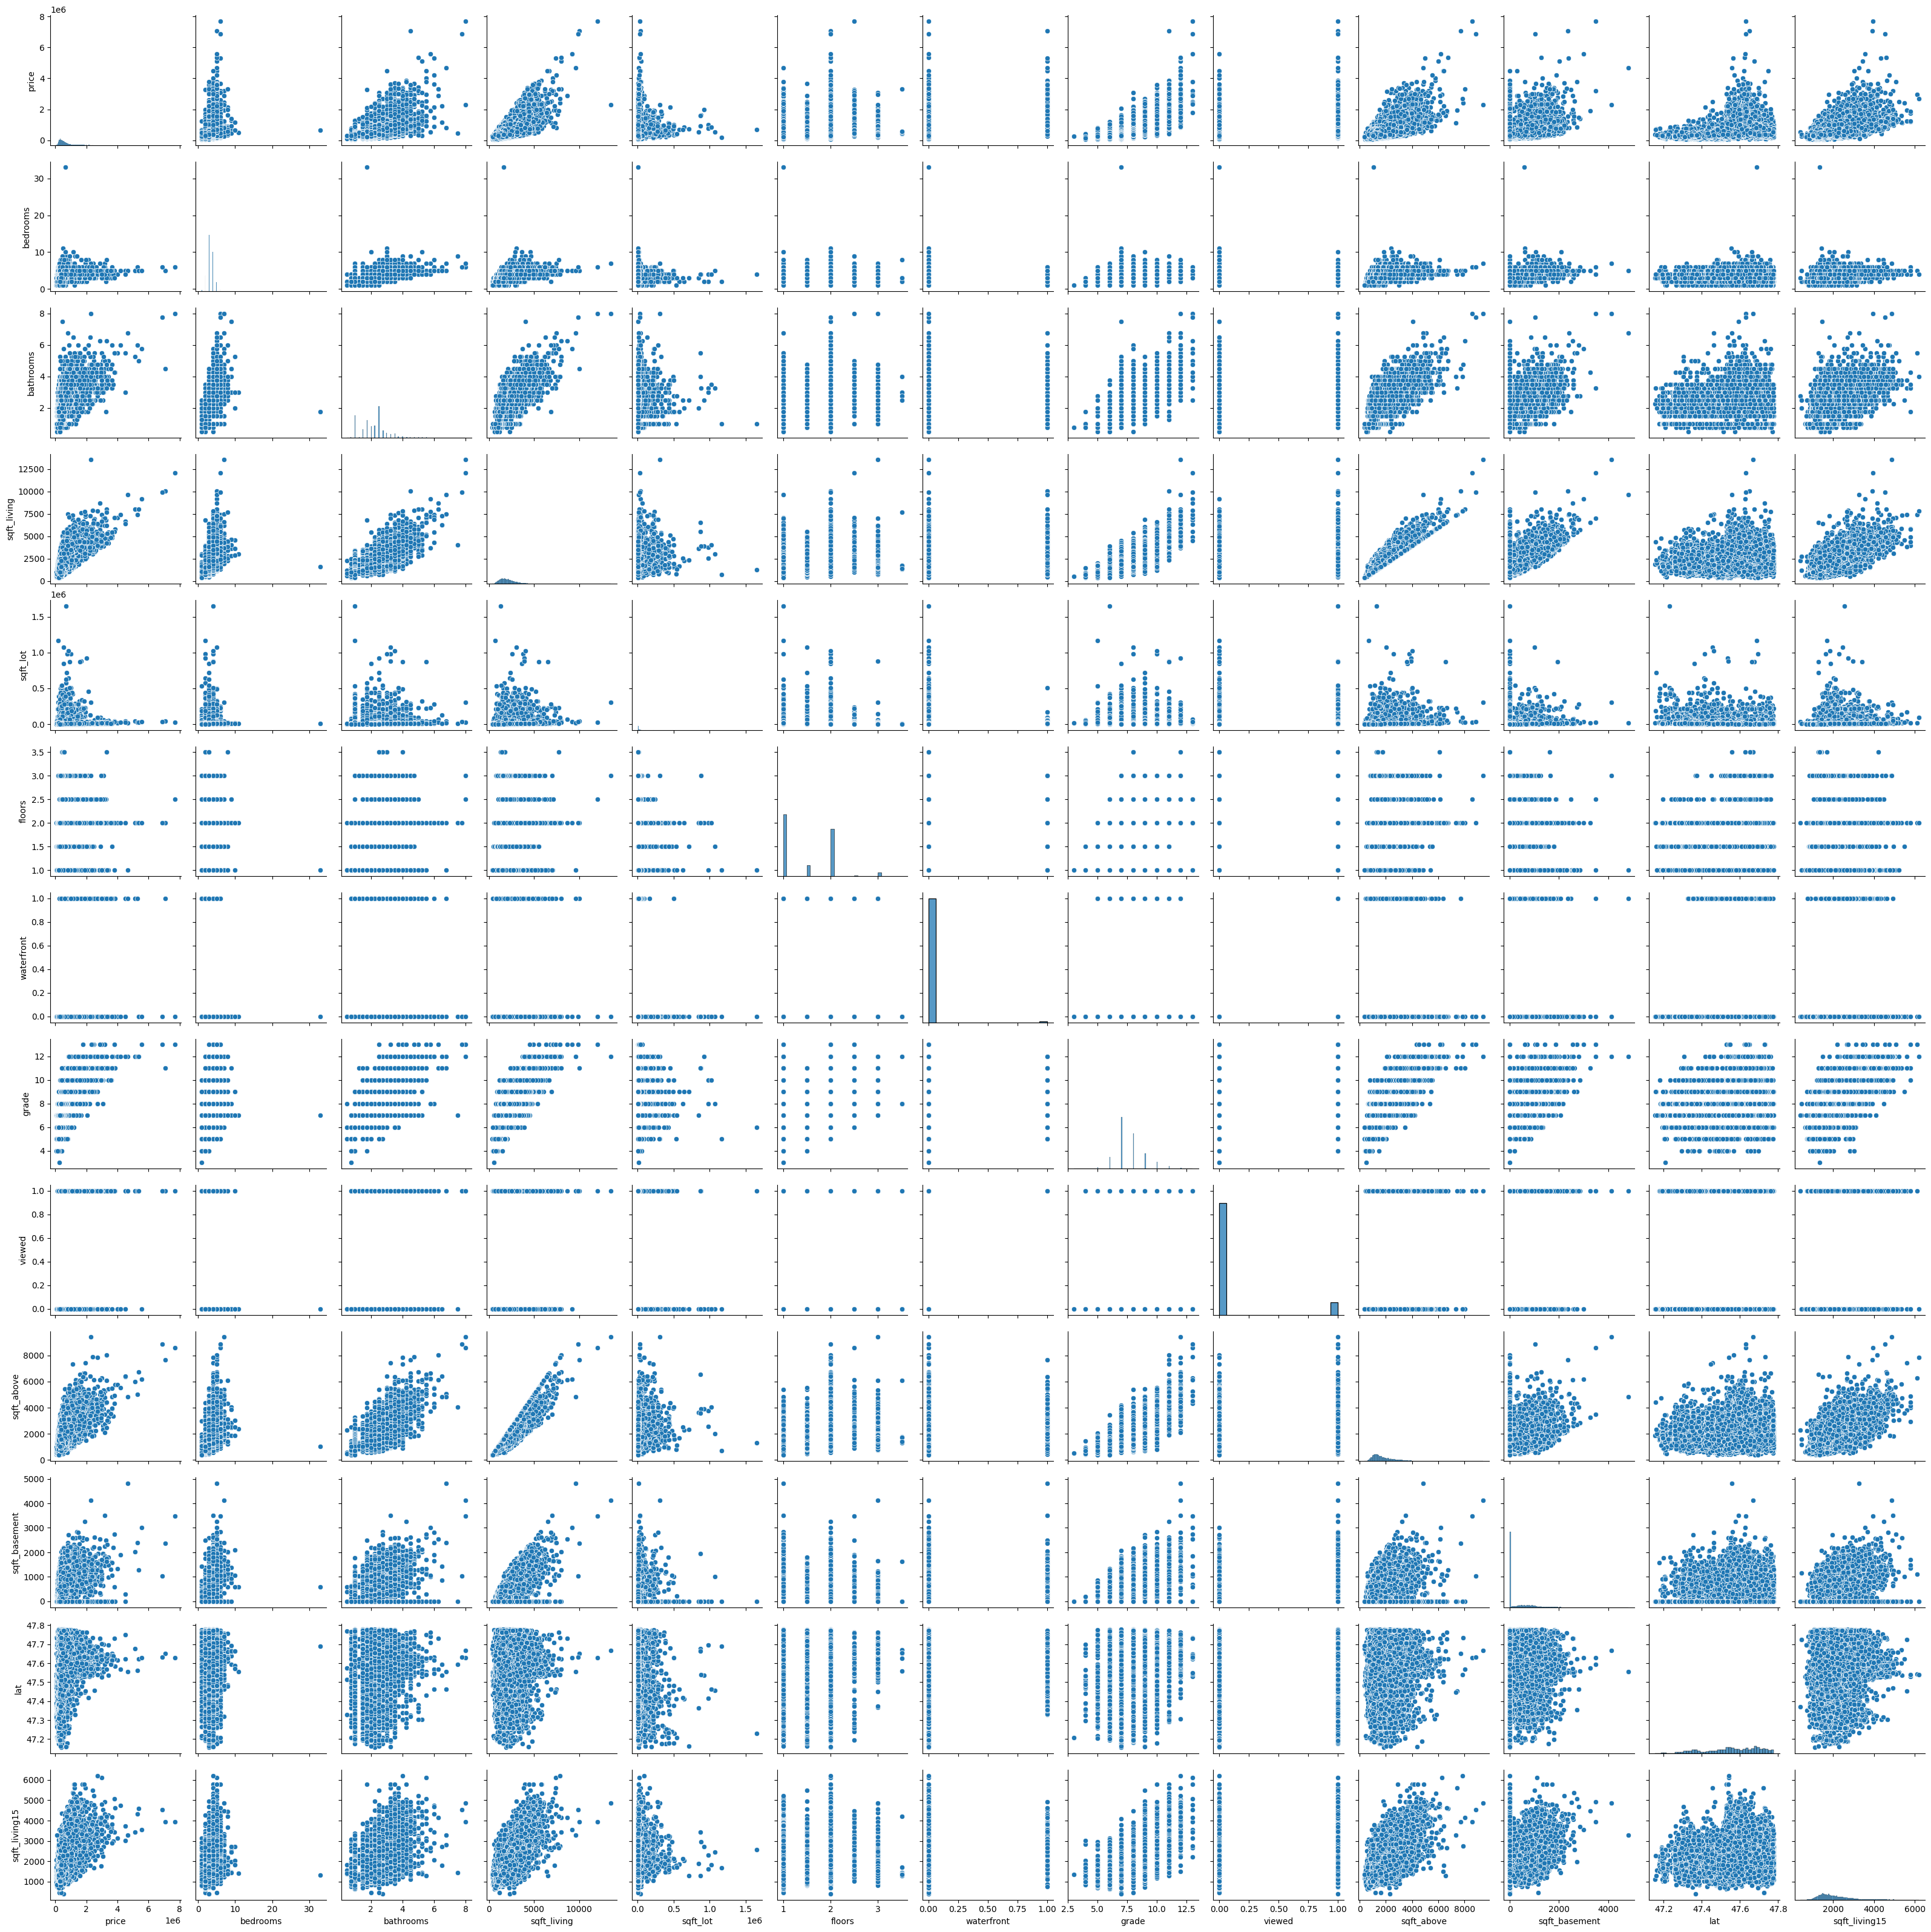

In [ ]:
#Viewing each feature paired against each other to view correlations and see trends
sns.pairplot(new_df)

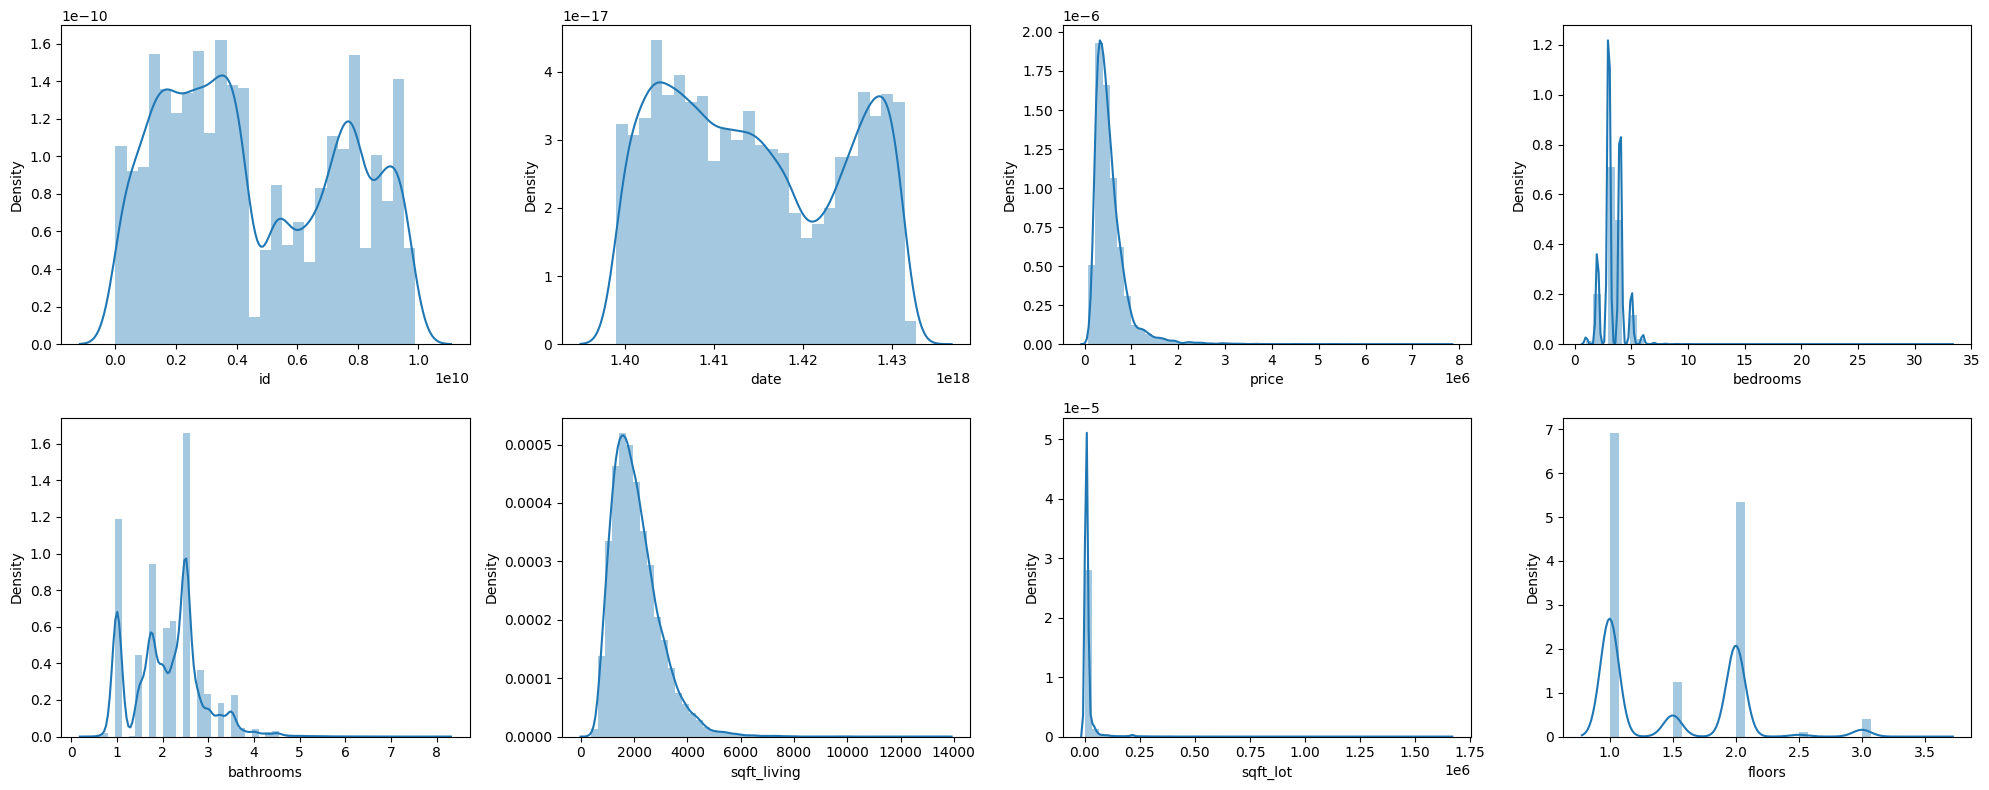

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Viewing the univariate distribution for each feature in the testing dataframe

#Creating variables for the number of rows and columns
rows = 2
cols = 4

#Creating subplot
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,8))

#Iterating through each row and column of the testing dataframe
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index += 1

plt.tight_layout()

In [ ]:
#Checking correlation in the new dataframe
corr = new_df.corr
corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,viewed,sqft_above,sqft_basement,lat,sqft_living15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.667951,0.353770,0.605368,0.323799,0.306692,0.585241
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.356563,0.078782,0.479386,0.302808,-0.009951,0.393406
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.665838,0.174090,0.686668,0.283440,0.024280,0.569884
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.762779,0.266760,0.876448,0.435130,0.052155,0.756402
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.114731,0.068035,0.184139,0.015418,-0.085514,0.144763
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.458794,0.015920,0.523989,-0.245715,0.049239,0.280102
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.082818,0.246530,0.071778,0.082800,-0.012157,0.083823
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,1.000000,0.233579,0.756073,0.168220,0.113575,0.713867
viewed,0.353770,0.078782,0.174090,0.266760,0.068035,0.015920,0.246530,0.233579,1.000000,0.150093,0.272605,0.007311,0.269870
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.756073,0.150093,1.000000,-0.052156,-0.001199,0.731767


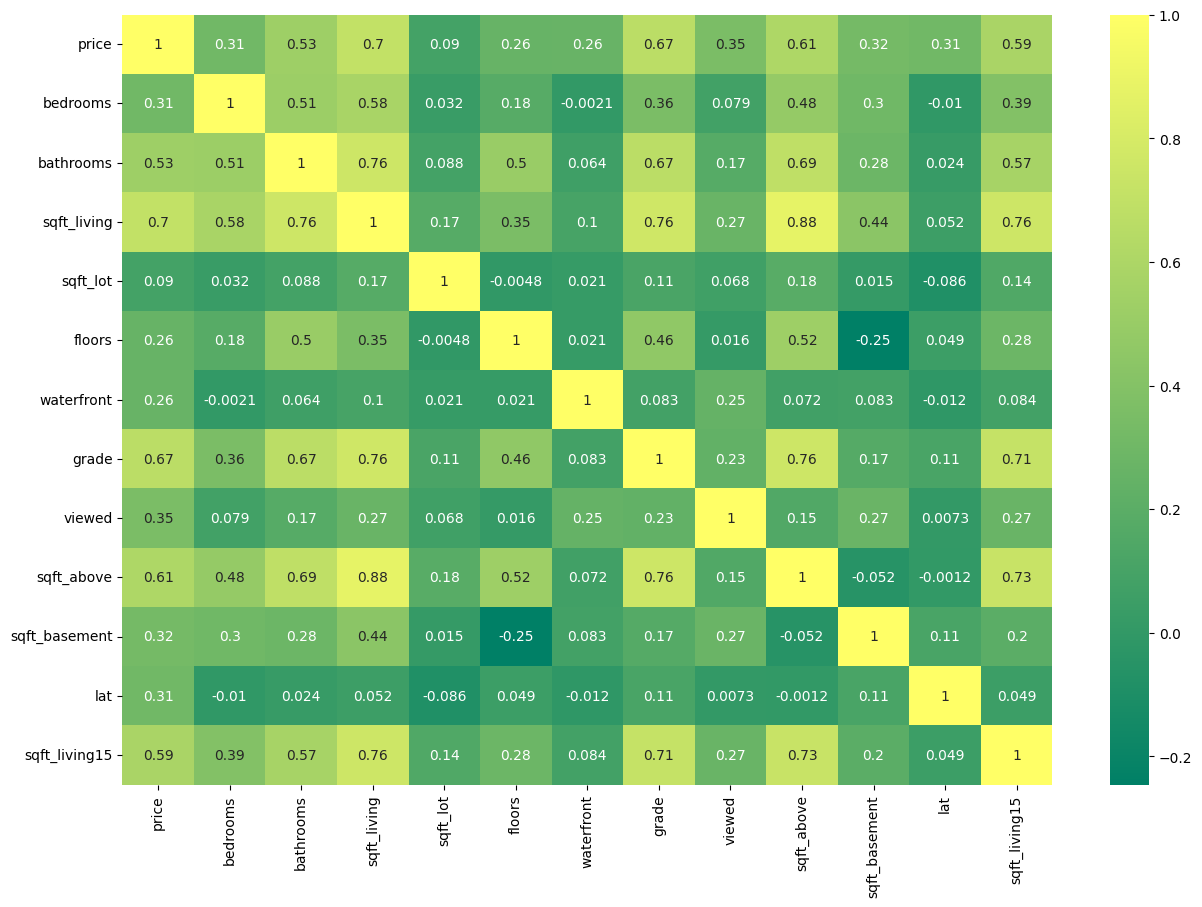

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_heatmap(dataframe):
    _, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(dataframe.corr(), annot=True, cmap='summer')

correlation_heatmap(new_df)
plt.savefig('/content/download (1).png', dpi=150)


The features that are most correlated with the price include:
- sqrft_living = 0.7
- Grade = 0.67
- Sqrft_above = 0.61
- Sqrft_living15 = 0.59
- Bathrooms = 0.53

In [ ]:
def get_correlation_features(corrdata, threshold):
    features = []
    values = []  # Define the 'values' list
    
    # Iterate over the correlation data
    for i, index in enumerate(corrdata.index):
        # Check if the absolute value of the correlation is above the threshold
        if abs(corrdata[index]) > threshold:
            features.append(index)
            values.append(corrdata[index])
    
    # Create a DataFrame with the correlated features and values
    df = pd.DataFrame(data=values, index=features, columns=['Corr Value'])
    return df


In [ ]:
#Setting the threshold
threshold = 0.5

#The correlated features for price greater than 50%
corr_value = get_correlation_features(corr()['price'], threshold)
corr_value

,Corr Value
price,1.000000
bathrooms,0.525906
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241


In [ ]:
#Creating a dataframe from the indices of the corr value
corr_data = df[corr_value.index]
corr_data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


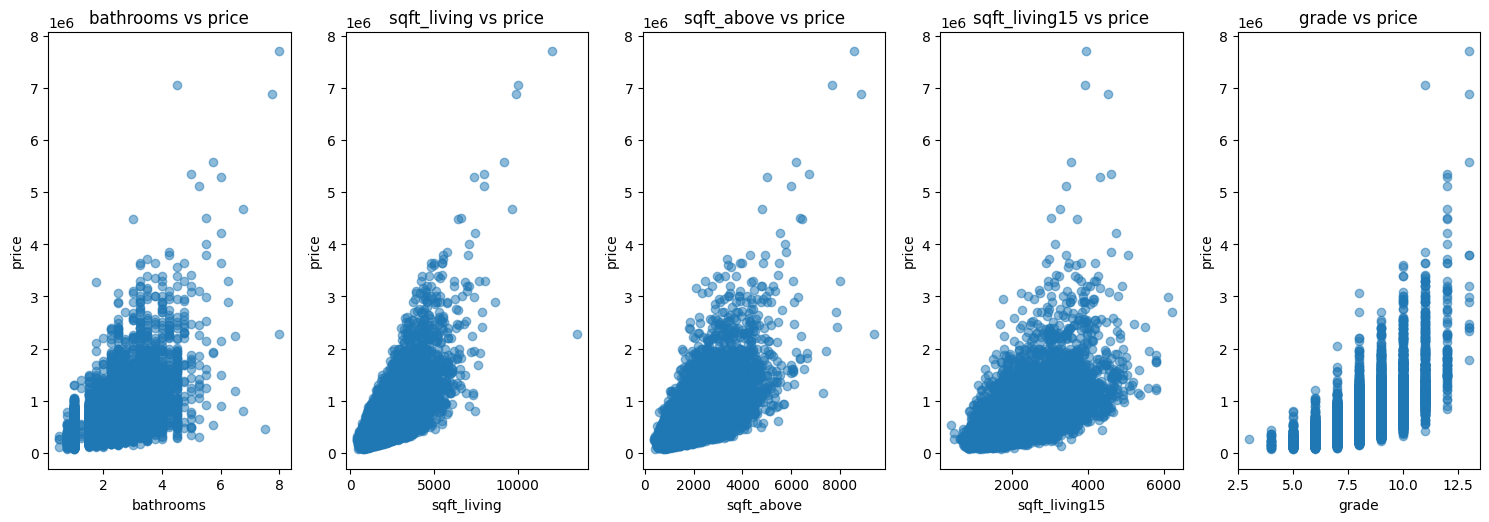

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select the desired features and the target variable
features = ['bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'grade']
target = 'price'

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = 5

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Plotting bivariate relationships
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{feature} vs {target}')

# Remove any unused subplots
if len(features) < n_rows * n_cols:
    for j in range(len(features), n_rows * n_cols):
        fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()


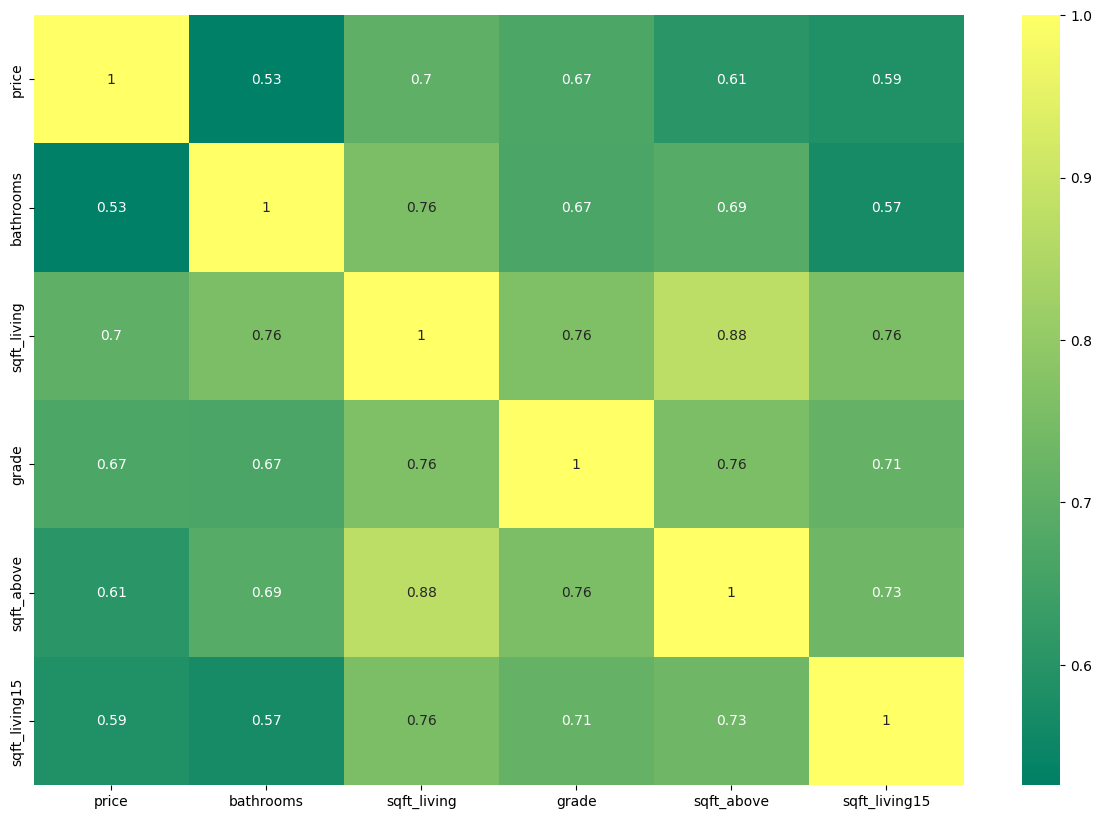

In [ ]:
correlation_heatmap(corr_data)


# **Simple Linear Regression**

In [ ]:
import statsmodels.api as sm

# defining our x and y parameters
x = df["sqft_living"]
y = df["price"]

x_predict = sm.OLS(y, sm.add_constant(x))
model = sm.OLS(endog=y,exog=sm.add_constant(x))


In [ ]:
results =model.fit()
summary = results.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:33:09   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

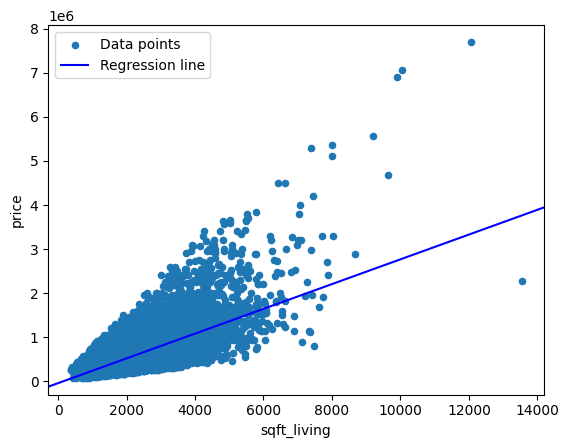

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax, color="blue")
ax.legend()
plt.show()

# **Multiple Linear Regression**

In [ ]:
#importing libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [ ]:
# Create dataframe for get dummies
# waterfront

df_dummy = df.copy(deep=True)

# The attributes to be used

dummy_df = df_dummy[['waterfront']]
df3 = pd.get_dummies(dummy_df, drop_first=True)
df3

,waterfront
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
21592,0.0
21593,0.0
21594,0.0
21595,0.0


In [ ]:
#getting attributes to use in the model

df2 = df.copy(deep=True)
df2.drop(['waterfront','id','date','bedrooms','sqft_lot','floors','view',
          'condition','sqft_basement','yr_built','yr_renovated',
          'zipcode','lat','long','sqft_lot15','viewed','basement', 'sqft_living15', 'sqft_above', 'grade'], axis=1, inplace=True)
df2.head()

,price,bathrooms,sqft_living
0,221900.0,1.00,1180
1,538000.0,2.25,2570
2,180000.0,1.00,770
3,604000.0,3.00,1960
4,510000.0,2.00,1680


In [ ]:
df2['waterfront'] = df3
print(df2)

          price  bathrooms  sqft_living  waterfront
0      221900.0       1.00         1180         0.0
1      538000.0       2.25         2570         0.0
2      180000.0       1.00          770         0.0
3      604000.0       3.00         1960         0.0
4      510000.0       2.00         1680         0.0
...         ...        ...          ...         ...
21592  360000.0       2.50         1530         0.0
21593  400000.0       2.50         2310         0.0
21594  402101.0       0.75         1020         0.0
21595  400000.0       2.50         1600         0.0
21596  325000.0       0.75         1020         0.0

[21597 rows x 4 columns]


In [ ]:
X = df2.drop('price', axis=1)
y = df2['price']

In [ ]:
#Creating multiple linear regression model

model = sm.OLS(endog=y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                          4.111e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        09:33:10   Log-Likelihood:                     -2.9927e+05
No. Observations:               21597   AIC:                                  5.985e+05
Df Residuals:                   21594   BIC:                                  5.986e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms   -1.325e+04   2874.067     -4.610      0.000   -1.89e+04   -7616.069
sqft_living   272.1194      2.851     95.442      0.000     266.531     277.708
waterfront   8.701e+05    2.1e+04     41.338      0.000    8.29e+05    9.11e+05
==============================================================================
Omnibus:                    14013.812   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491344.628
Skew:                           2.609   Prob(JB):                         0.00
Kurtosis:                      25.777   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


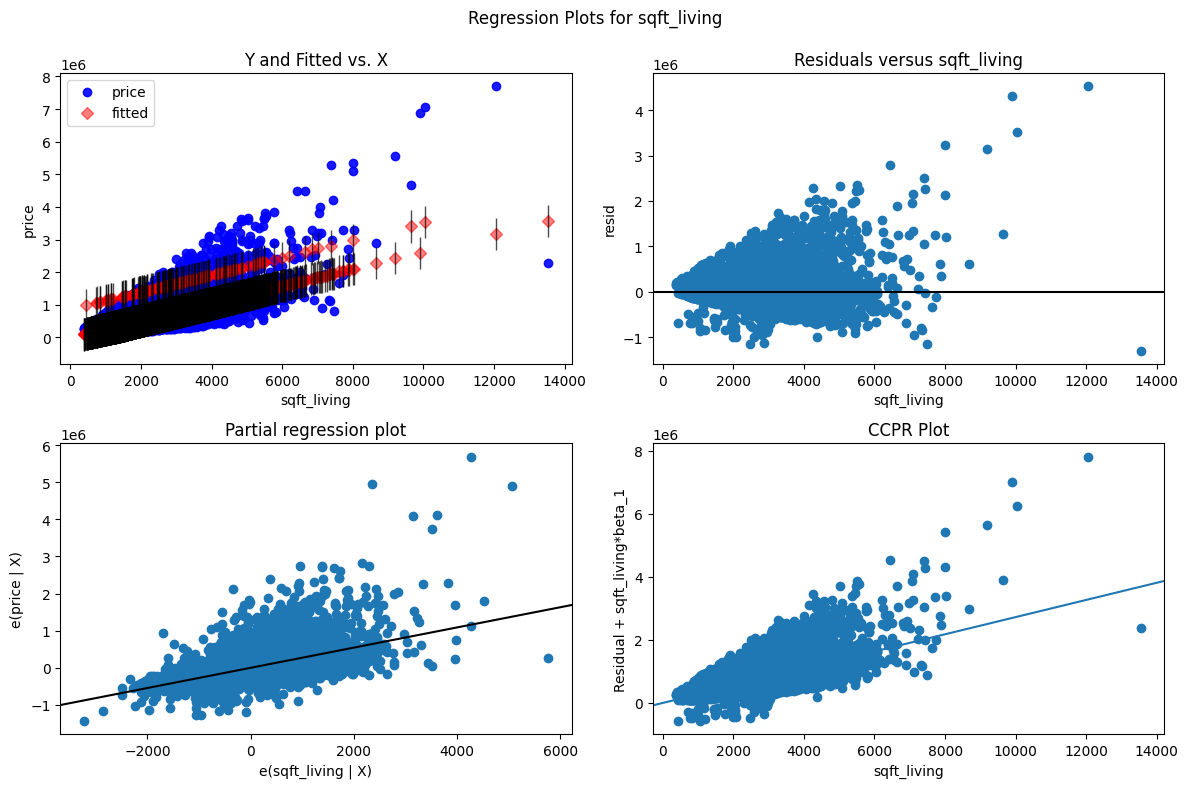

In [ ]:
#checking residuals for sqft_living vairables
sm.graphics.plot_regress_exog(results, 'sqft_living', fig=plt.figure(figsize=(12,8)));

# Checking the distribution of the target

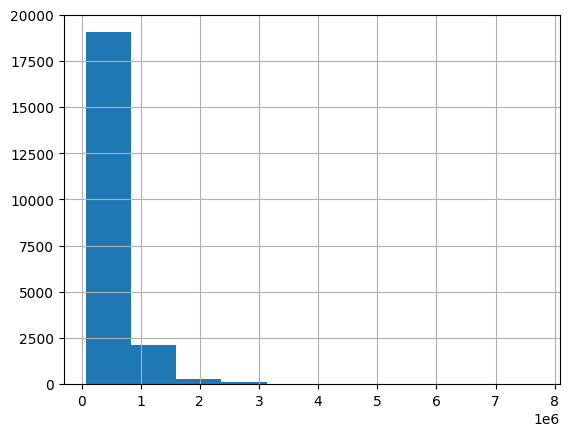

In [ ]:
y.hist();

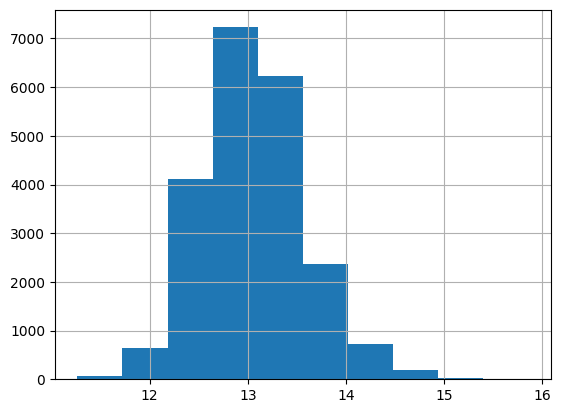

In [ ]:
y_new= np.log(y)
y_new.hist();

In [ ]:
#model with transformed target (log_scaled target)
model2 = sm.OLS(y_new, X)
results2 = model2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                          6.378e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        09:33:13   Log-Likelihood:                         -61424.
No. Observations:               21597   AIC:                                  1.229e+05
Df Residuals:                   21594   BIC:                                  1.229e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms       4.4689      0.047     94.303      0.000       4.376       4.562
sqft_living     0.0011    4.7e-05     22.447      0.000       0.001       0.001
waterfront     -1.3921      0.347     -4.011      0.000      -2.072      -0.712
==============================================================================
Omnibus:                     2152.901   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4674.847
Skew:                          -0.629   Prob(JB):                         0.00
Kurtosis:                       4.901   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusions
Model 2 can be considered a better predictor compared to Model 1 based on the R-squared value. The R-squared value for Model 2 is 0.899, indicating that approximately 89.9% of the variance in the dependent variable (price) can be explained by the independent variables; bathrooms, sqrft_living and waterfront
The best features that determine the price depending on the original dataframe include: 

R-squared (uncentered): The R-squared value of 0.899 indicates that the model explains approximately 89.9% of the variance in the dependent variable (price). This suggests that the independent variables included in the model (bathrooms, sqft_living, waterfront) collectively have a strong association with the price.

Adjusted R-squared (uncentered): The adjusted R-squared value is also 0.899, which means that the inclusion of the three independent variables in the model is not significantly impacting the overall goodness of fit. The adjusted R-squared value is useful for comparing models with different numbers of predictors.

F-statistic: The F-statistic has a very large value of 6.378e+04, and the associated probability (Prob (F-statistic)) is 0.00. This indicates that the overall model is statistically significant, suggesting that at least one of the independent variables has a significant impact on the price.

Coefficients: The coefficients for the independent variables indicate the magnitude and direction of their relationship with the dependent variable (price).

Bathrooms: The coefficient for the "bathrooms" variable is 4.4689, indicating a positive relationship with the price. A one-unit increase in the number of bathrooms is associated with an increase in the price by approximately 4.4689 units.

Sqft_living: The coefficient for the "sqft_living" variable is 0.0011, indicating a positive relationship with the price. A one-unit increase in the square footage of living area is associated with an increase in the price by approximately 0.0011 units.

Waterfront: The coefficient for the "waterfront" variable is -1.3921, indicating a negative relationship with the price. A property with a waterfront location is associated with a decrease in the price by approximately 1.3921 units.

All three variables have p-values close to zero, indicating that they are highly statistically significant in relation to the price